Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Reading the DataSet

In [5]:
df = pd.read_excel("/content/TrainingSheet.xlsx")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')
df

Close Price
Date                   
2000-01-03      1592.20
2000-01-04      1638.70
2000-01-05      1595.80
2000-01-06      1617.60
2000-01-07      1613.30
...                 ...
2004-02-17      1920.10
2004-02-18      1916.45
2004-02-19      1858.30
2004-02-20      1852.65
2004-02-23      1808.20

[1038 rows x 1 columns]

**Data Preprocessing as mentioned in paper**

---

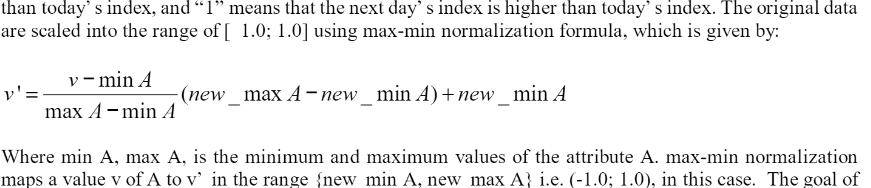

In [6]:
from sklearn import preprocessing
import numpy as np
X_train = df
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)


[[0.65428432]
 [0.69550955]
 [0.65747595]
 ...
 [0.89019903]
 [0.88518995]
 [0.84578217]]


**Categorisation as suggested**

---
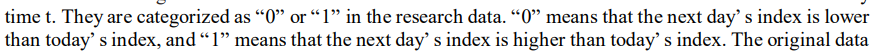


In [7]:

y_train = np.where(df['Close Price'].shift(-1) > df['Close Price'], 1, 0)
y_train

X = pd.read_excel("/content/TestSheet.xlsx")
X.index = pd.to_datetime(X['Date'])
X = X.drop(['Date'], axis='columns')
y_test = np.where(X['Close Price'].shift(-1) > X['Close Price'], 1, 0)

Train-test data & the Model

In [8]:

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the logistic regression model
logit_model = LogisticRegression()

# Train the model on the training data
logit_model.fit(X_train_minmax, y_train)

# Make predictions on the test data
y_pred = logit_model.predict(X)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [9]:

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:', cm)

Accuracy: 0.5482866043613707
Confusion matrix: [[  0 145]
 [  0 176]]


Reference Table:

---

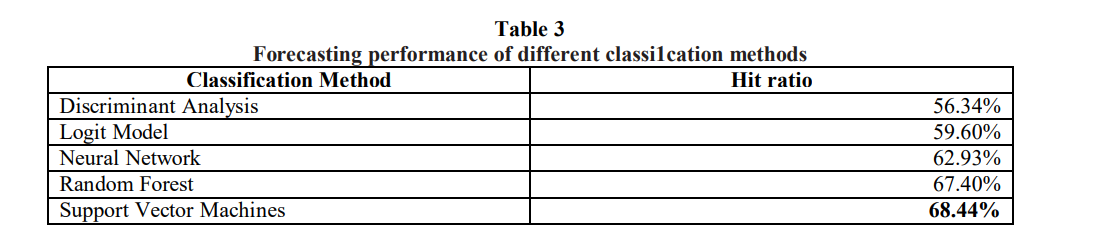